   1000      10000     100000    1000000
0    3.092  3.151600  3.139520  3.140512
1    3.084  3.171600  3.137880  3.138868
2    3.168  3.148400  3.139640  3.140896
3    3.156  3.154400  3.144280  3.143408
4    3.188  3.126800  3.132000  3.140216
5    3.092  3.147600  3.138560  3.141520
6    3.130  3.150067  3.138647  3.140903


/tmp/ipython-input-2825894217.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


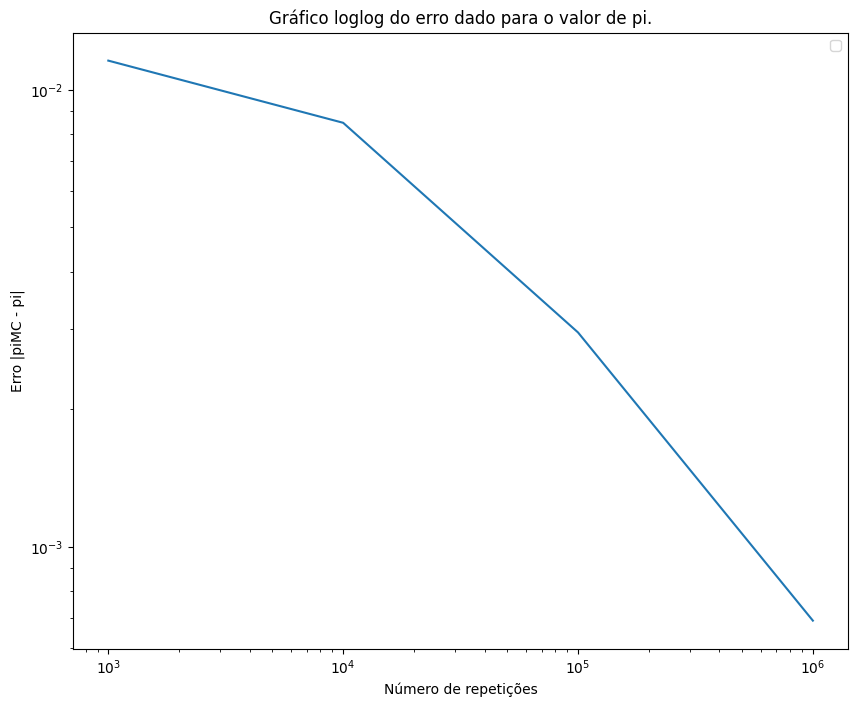

In [ ]:
# QUESTÃO 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

m = 6  # Número de vezez que será realizado o experimento dada uma configuração
N = [10**3, 10**4, 10**5, 10**6] # Número de pontos a serem lançados
erros = [] # Lista que receberá os valores dos erros
tabela = dict() # Inicializo e crio uma tabela que é um dicionário, onde cada value expressa os itens da coluna
for n in N:
  tabela[n] = []

def MMC(N):
  """
  Essa função lançara os N pontos e contabilizará quantos pontos cairam dentro da circunfêrencia de raio 1
  """
  counter = 0
  for n in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2 + y**2 < 1:
      counter += 1
  return 4*(counter/N)

# ===== Experimentos =====

for n in N:
  for i in range(m):
    tabela[n].append(MMC(n))
  media = np.mean(tabela[n])
  tabela[n].append(media)
  erros.append(abs(np.pi - media))

df = pd.DataFrame(tabela)
print(df)

plt.figure(figsize=(10,8))
plt.title("Gráfico loglog do erro dado para o valor de pi.")
plt.ylabel("Erro |piMC - pi|")
plt.xlabel("Número de repetições")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.plot(N, erros)
plt.show()



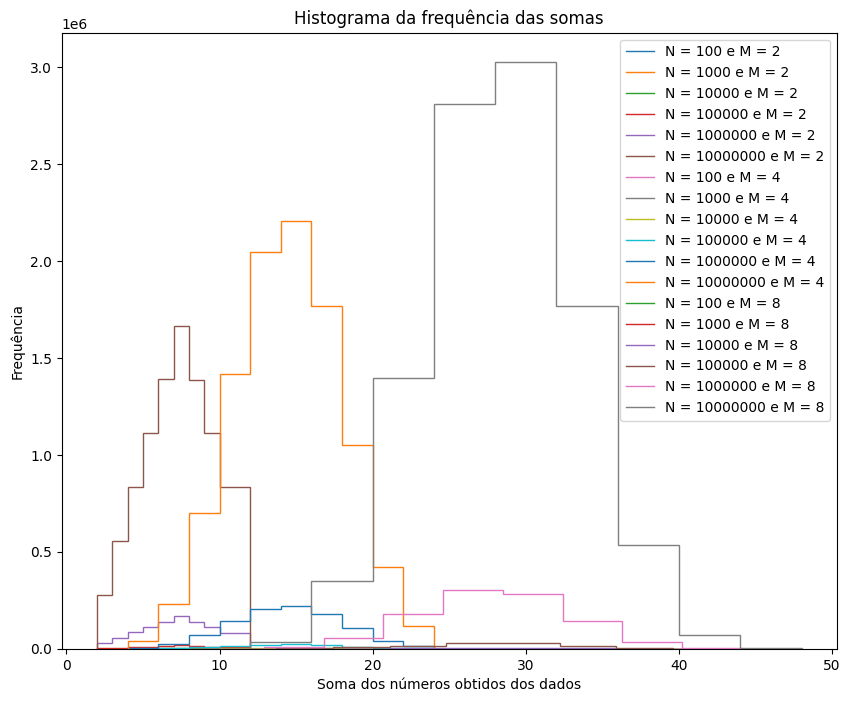

In [ ]:
# QUESTÃO 1

import numpy as np
from matplotlib import pyplot as plt

N = [10**2,10**3,10**4,10**5,10**6,10**7] # Número de vezes que é lançado uma rodada de dados
M = [2,4,8] # Lista com número de dados lançados

def dados(N,M):
  resultados = []
  for i in range(N):
    lancamentos = np.random.randint(1, 7 , M, int)
    resultados.append(np.sum(lancamentos))

  return resultados

plt.figure(figsize=(10,8))
plt.title("Histograma da frequência das somas")
plt.xlabel("Soma dos números obtidos dos dados")
plt.ylabel("Frequência")

for m in M:
  for n in N:
    counts, bins = np.histogram(dados(n,m))
    plt.stairs(counts, bins, label = f'N = {n} e M = {m}')

plt.legend()
plt.show()







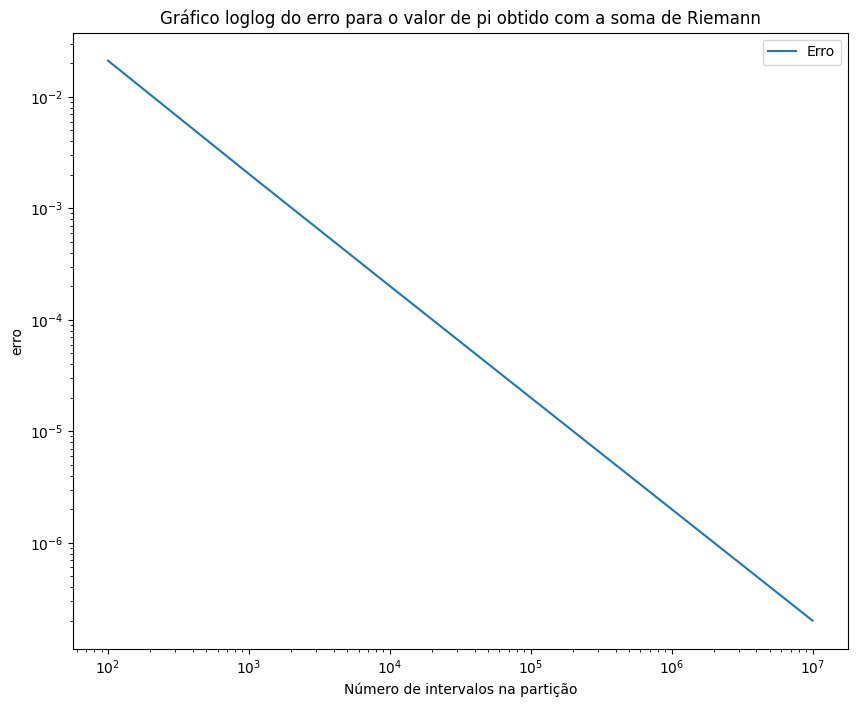

In [ ]:
# QUESTÃO 3

import numpy as np
from matplotlib import pyplot as plt

N = [10**2,10**3,10**4,10**5,10**6,10**7]

resultados = []

def funcao(x):
  return (1-(x)**2)**0.5

def SomaRiemann(a, b, n, f):
  tam_intervalo = (b-a)/n
  somatorio = 0
  for i in range(n):
    somatorio += f(a+(i+1)*tam_intervalo)*tam_intervalo
  return somatorio

for n in N:
  resultados.append(abs(np.pi - SomaRiemann(0,1,n,funcao)*4))

plt.figure(figsize=(10,8))
plt.plot(N, resultados, label='Erro')
plt.title("Gráfico loglog do erro para o valor de pi obtido com a soma de Riemann")
plt.xlabel("Número de intervalos na partição")
plt.ylabel("erro")
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

A área entre as curvas é por Monte Carlo é 12.710883876424303, área entre as curvas calculando as integrais 12.566409999999998


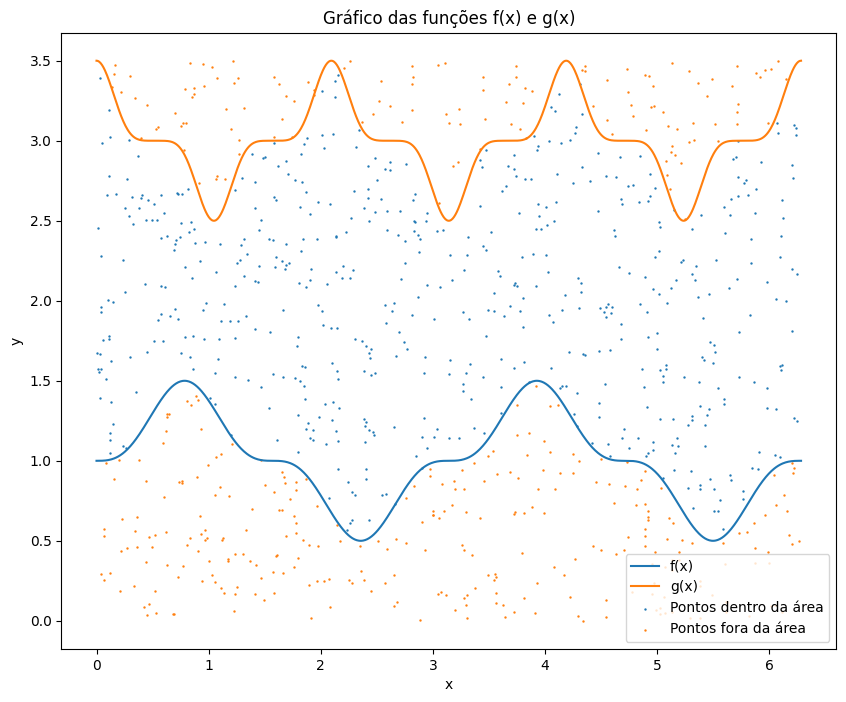

In [ ]:
# QUESTÃO 4

import numpy as np
from matplotlib import pyplot as plt

def f(x):
  return 1 + 0.5*(np.sin(2*x))**3

def g(x):
  return 3 + 0.5*(np.cos(3*x))**5

#Plotando os gráficos

dom = np.linspace(0,2*np.pi,1000)
plt.figure(figsize=(10,8))
plt.title("Gráfico das funções f(x) e g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(dom, f(dom), label = 'f(x)')
plt.plot(dom, g(dom), label = 'g(x)')


# Áreas calculadas pelo wolffram alpha

area_f = 6.28319
area_g = 18.8496
area_entre_funcoes = area_g - area_f



N = 10**4 # Número de pontos a serem plotados

def MMC(f ,g, N):
  x_pontos_dentro = []
  y_pontos_dentro = []
  x_pontos_fora = []
  y_pontos_fora = []

  # Criando o algoritmo de Monte Carlo para calcular as integrais

  X = np.random.uniform(0,2*np.pi, N)
  Y= np.random.uniform(0,3.5, N)
  counter = 0

  for i in range(N):
    if f(X[i]) < Y[i] < g(X[i]):
      counter += 1
      x_pontos_dentro.append(X[i])
      y_pontos_dentro.append(Y[i])
    else:
      x_pontos_fora.append(X[i])
      y_pontos_fora.append(Y[i])

  A_MMC = (3.5*2*np.pi)*((counter)/(N))


  plt.scatter(x_pontos_dentro, y_pontos_dentro, label = 'Pontos dentro da área', s = 0.5)
  plt.scatter(x_pontos_fora, y_pontos_fora, label = 'Pontos fora da área', s = 0.5)
  print(f"A área entre as curvas é por Monte Carlo é {A_MMC}, área entre as curvas calculando as integrais {area_entre_funcoes}")
  plt.legend()
  plt.show()

MMC(f,g,N)


INÍCIO


/tmp/ipython-input-2322613262.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


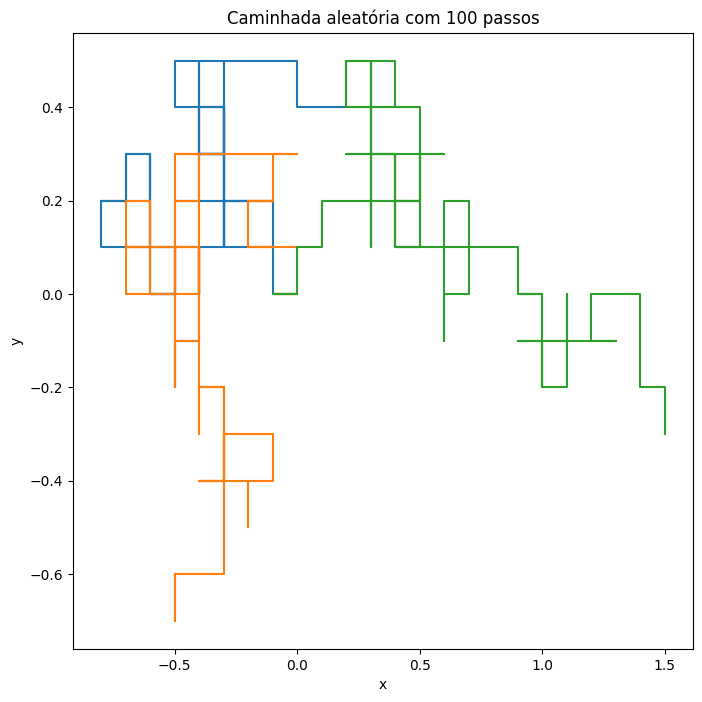

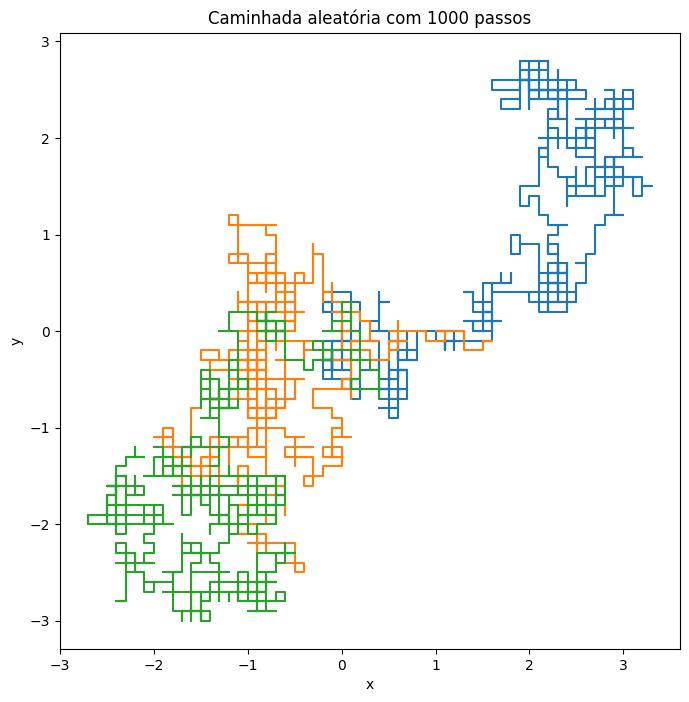

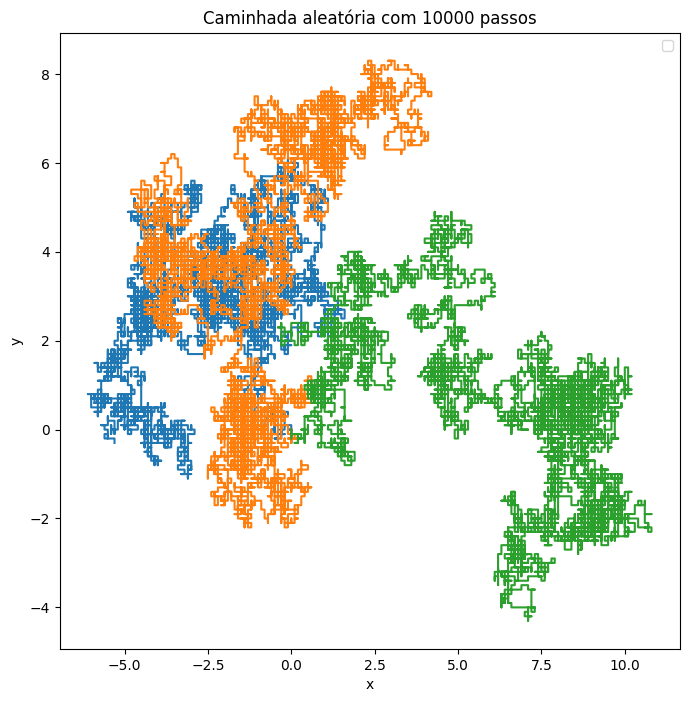

/tmp/ipython-input-2322613262.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


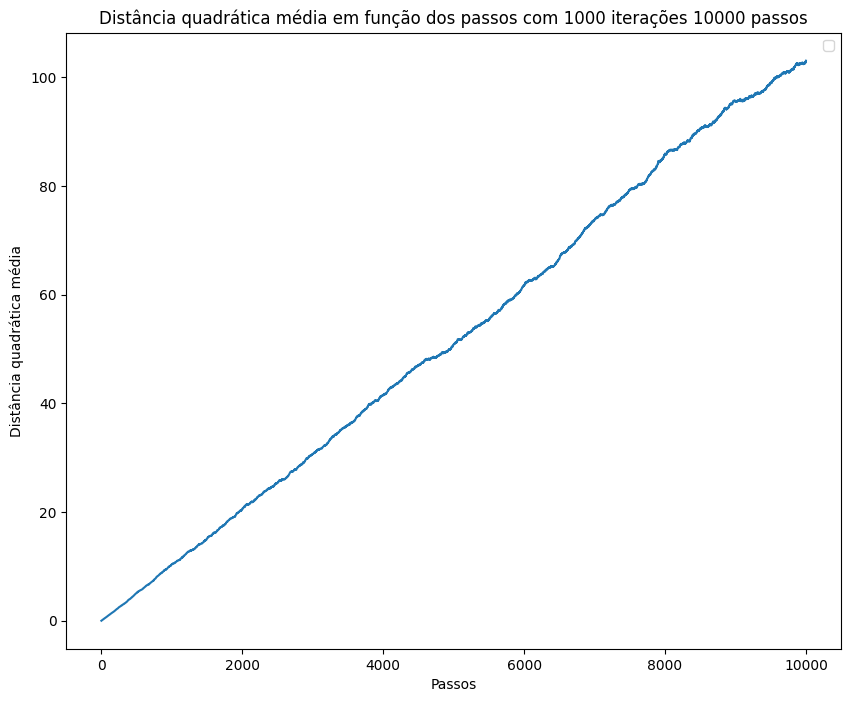

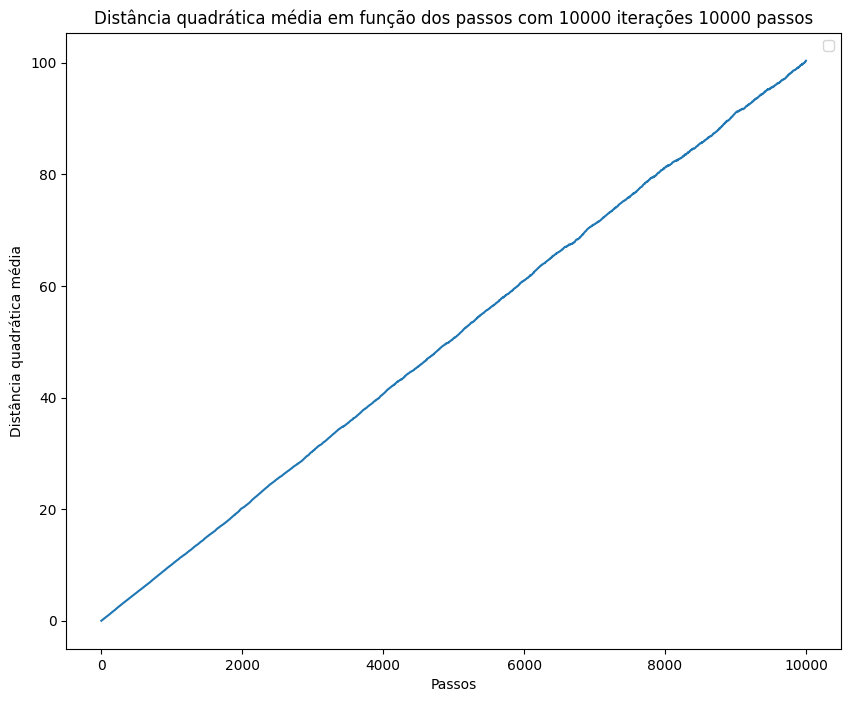

FIM


In [ ]:
# QUESTÂO 9

import numpy as np
from matplotlib import pyplot as plt

print("INÍCIO")


def caminhada_aleatoria(N:int, tam:float, modo:int):
  """Essa função retorna as coordenadas para cada iteração da caminhada (modo 0)
  além da um vetor contendo a distância quadrática da partícula para cada iteração (modo 1)"""
  # Inicializo as listas que conterão as coordenadas em x e y, além de dois vetores,
  #um deles armazenará a distância quadrática média para cada iteração e o outro apresenta números inteiros randomicos do intervalo [0,3]
  coord_x = [0]
  coord_y = [0]
  D_quadrado = np.zeros(N)
  direcoes = np.random.randint(0,4, N)
  for i in range(1,N+1):
    if direcoes[i-1] == 0:
      coord_x.append(coord_x[i-1] + tam)
      coord_y.append(coord_y[i-1])
    elif direcoes[i-1] == 1:
      coord_x.append(coord_x[i-1] - tam)
      coord_y.append(coord_y[i-1])
    elif direcoes[i-1] == 2:
      coord_x.append(coord_x[i-1])
      coord_y.append(coord_y[i-1] + tam)
    elif direcoes[i-1] == 3:
      coord_x.append(coord_x[i-1])
      coord_y.append(coord_y[i-1] - tam)
    D_quadrado[i-1] = ((coord_x[i] - coord_x[0])**2 + (coord_y[i] - coord_y[0])**2)

  if modo == 0:
   return((coord_x, coord_y))

  if modo == 1:
    return D_quadrado

# Plotando algumas caminhadas aleatórias

k = 3 # Número caminhadas realizadas com cada passo
N = [10**2, 10**3,10**4] # Lista com quantidades de passos a serem dados em na caminhada
for n in N:
    plt.figure(figsize=(8,8))
    plt.title(f"Caminhada aleatória com {n} passos")
    plt.xlabel("x")
    plt.ylabel("y")
    for i in range(k):
      coords = caminhada_aleatoria(n, 0.1, 0)
      plt.plot(coords[0], coords[1])
plt.legend()
plt.show()

# Calcular a distância quadrática média


M = [10**3, 10**4] # Lista com o número de realizações que serão feitas
N = 10**4 # Número de passos dado na caminhada
dom = np.linspace(1,N,N) # Domínio da função que será plotada, distancia quadrática média vs número de iteração (passo)

for m in M:
  matriz_D_quadrado = np.zeros((m,N))
  for i in range(m):
    matriz_D_quadrado[i] = caminhada_aleatoria(N, 0.1, 1)

  distancia_quadratica_media = np.mean(matriz_D_quadrado, axis = 0)
  plt.figure(figsize = (10,8))
  plt.title(f"Distância quadrática média em função dos passos com {m} iterações {n} passos")
  plt.xlabel("Passos")
  plt.ylabel("Distância quadrática média")
  plt.plot(dom, distancia_quadratica_media)
  plt.legend()
  plt.show()
print('FIM')



In [ ]:
import numpy as np
from matplotlib import pyplot as plt


matriz_D_quadrado = np.array([[1,2],[1,4]])
distancia_quadratica_media = np.mean(matriz_D_quadrado, axis = 0)
print(distancia_quadratica_media)
dom = np.linspace(1,10,10)
print(dom)


[1. 3.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


A área entre as curvas é por Monte Carlo é 15.860477562481329, área entre as curvas calculando as integrais 15.89974333333333


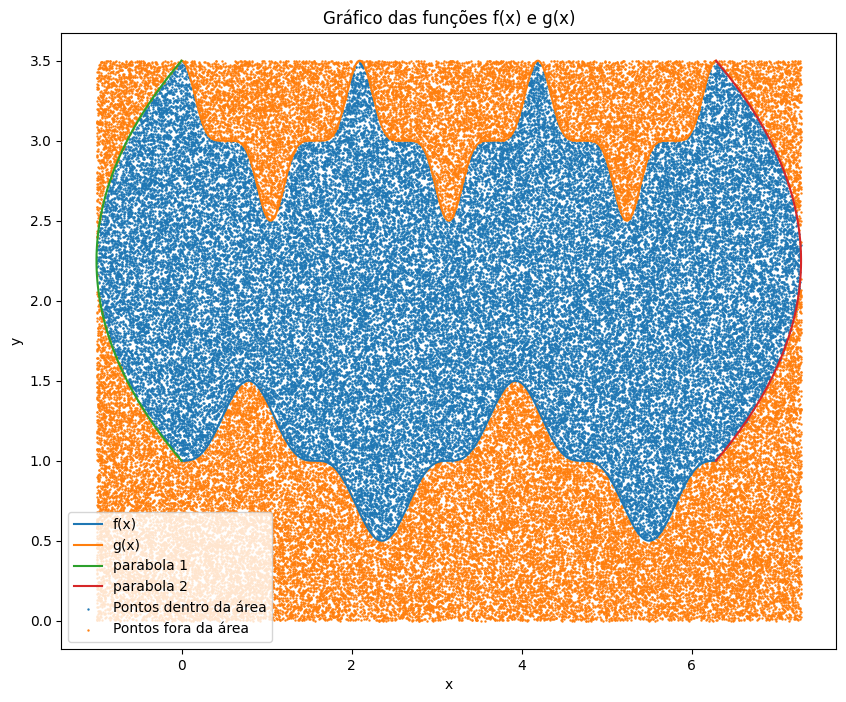

In [ ]:
# QUESTÃO 5

import numpy as np
from matplotlib import pyplot as plt

def f(x):
  return 1 + 0.5*(np.sin(2*x))**3

def g(x):
  return 3 + 0.5*(np.cos(3*x))**5

def parabola1(y):
  return (y**2 - 4.5*y + 3.5)/(1.25**2)

def parabola2(y):
  return (-y**2 + 4.5*y - 3.5)/(1.25**2) + 2*np.pi

#Plotando os gráficos


dom_parabola= np.linspace(1,3.5,100)
dom = np.linspace(0,2*np.pi,1000)
plt.figure(figsize=(10,8))
plt.title("Gráfico das funções f(x) e g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(dom, f(dom), label = 'f(x)')
plt.plot(dom, g(dom), label = 'g(x)')
plt.plot(parabola1(dom_parabola), dom_parabola, label = 'parabola 1')
plt.plot(parabola2(dom_parabola), dom_parabola, label = 'parabola 2')


# Áreas calculadas pelo wolffram alpha

area_f = 6.28319
area_g = 18.8496
area_entre_funcoes = area_g - area_f + 2*(125/48)/(1.25**2)



N = 10**5

def MMC(f ,g, N):
  x_pontos_dentro = []
  y_pontos_dentro = []
  x_pontos_fora = []
  y_pontos_fora = []

  # Criando o algoritmo de Monte Carlo para calcular as integrais

  X = np.random.uniform(-1, 2*np.pi + 1, N)
  Y= np.random.uniform(0,3.5, N)
  counter = 0

  for i in range(N):
    if(-1 <= X[i] < 0):
      if((Y[i]**2 -4.5*Y[i] + 3.5)/(1.25**2) < X[i]):
        counter += 1
        x_pontos_dentro.append(X[i])
        y_pontos_dentro.append(Y[i])
      else:
        x_pontos_fora.append(X[i])
        y_pontos_fora.append(Y[i])

    elif(2*np.pi < X[i] <= 2*np.pi + 1):
      if( (-Y[i]**2 + 4.5 * Y[i] - 3.5)/(1.25**2) + 2*np.pi > X[i]):
        counter += 1
        x_pontos_dentro.append(X[i])
        y_pontos_dentro.append(Y[i])
      else:
        x_pontos_fora.append(X[i])
        y_pontos_fora.append(Y[i])

    elif(0 <= X[i]  <= 2*np.pi):
      if(f(X[i])) < Y[i] < g(X[i]):
        counter += 1
        x_pontos_dentro.append(X[i])
        y_pontos_dentro.append(Y[i])
      else:
        x_pontos_fora.append(X[i])
        y_pontos_fora.append(Y[i])

  A_MMC = (3.5*(2*np.pi + 2))*((counter)/(N))


  plt.scatter(x_pontos_dentro, y_pontos_dentro, label = 'Pontos dentro da área', s = 0.5)
  plt.scatter(x_pontos_fora, y_pontos_fora, label = 'Pontos fora da área', s = 0.5)
  print(f"A área entre as curvas é por Monte Carlo é {A_MMC}, área entre as curvas calculando as integrais {area_entre_funcoes}")
  plt.legend()
  plt.show()

MMC(f,g,N)

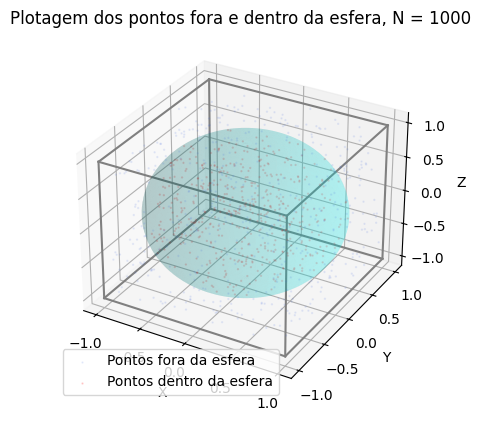

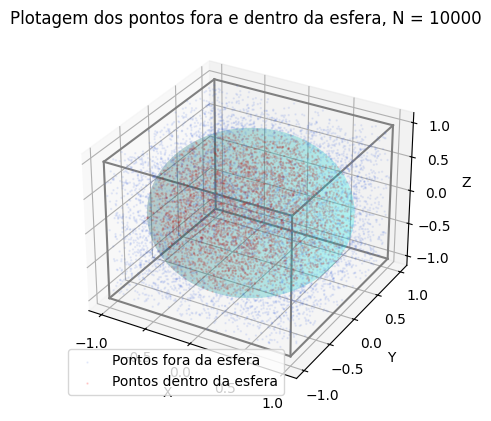

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


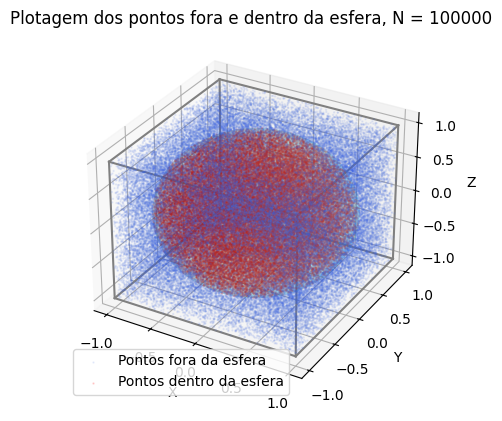

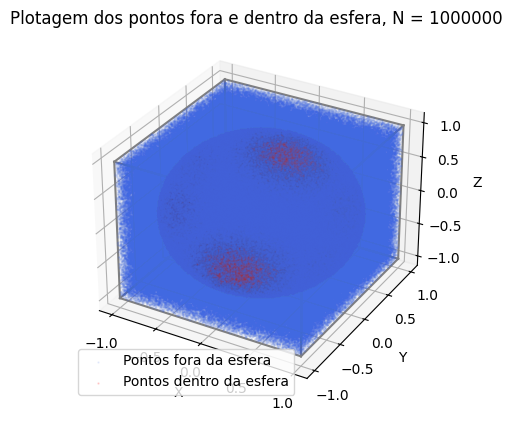

   1000     10000    100000    1000000
0    3.060   3.1212  3.13734  3.143760
1    3.102   3.0846  3.14898  3.141744
2    3.018   3.0810  3.14376  3.143112
3    3.234   3.1410  3.15324  3.144240
4    3.120   3.1464  3.16260  3.137718
5    3.036   3.1188  3.16254  3.142044
6    3.095   3.1155  3.15141  3.142103


/tmp/ipython-input-2568856841.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


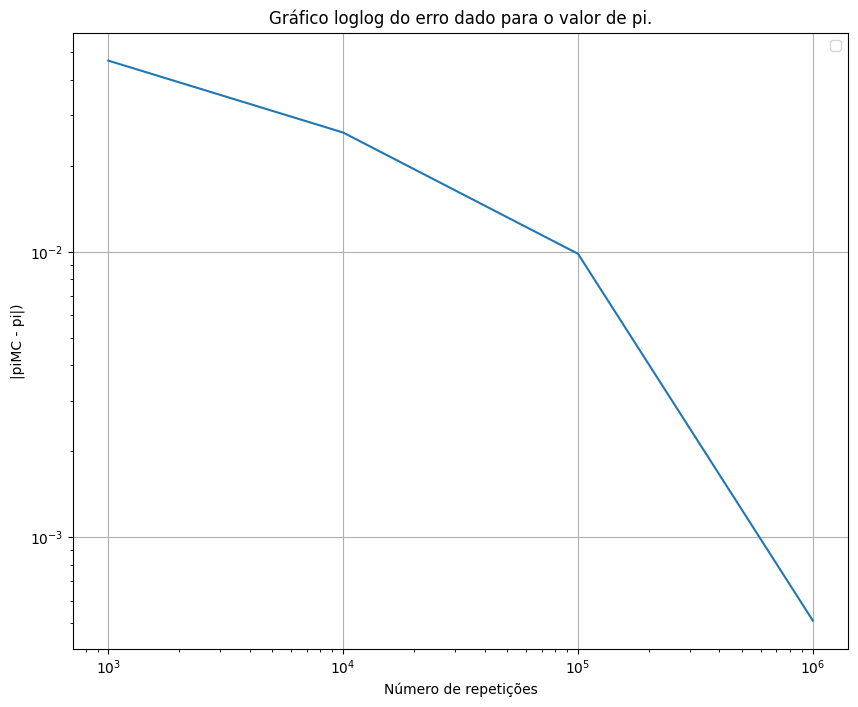

Tempo de de execução foi 152.4338436126709


In [ ]:
# QUESTÃO 6 NÃO VETORIZADO

import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t0 = time.time()
m = 6
N = [10**3, 10**4, 10**5, 10**6]
erros = []
tabela = dict()
for n in N:
  tabela[n] = []

def MMC(N):
  counter = 0
  coord_x_ponto_fora = []
  coord_y_ponto_fora = []
  coord_z_ponto_fora = []
  coord_x_ponto_dentro = []
  coord_y_ponto_dentro = []
  coord_z_ponto_dentro = []
  for n in range(N):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    z = np.random.uniform(-1,1)

    if x**2 + y**2 + z**2 < 1:
      counter += 1
      coord_x_ponto_dentro.append(x)
      coord_y_ponto_dentro.append(y)
      coord_z_ponto_dentro.append(z)
    else:
      coord_x_ponto_fora.append(x)
      coord_y_ponto_fora.append(y)
      coord_z_ponto_fora.append(z)



  return [6*(counter/N), coord_x_ponto_fora, coord_y_ponto_fora, coord_z_ponto_fora , coord_x_ponto_dentro, coord_y_ponto_dentro, coord_z_ponto_dentro]

# ===== Experimentos =====

for n in N:
    for i in range(m):
      resultados = MMC(n)
      tabela[n].append(resultados[0])
    media = np.mean(tabela[n])
    tabela[n].append(media)
    erros.append(abs(np.pi - media))


    # Plotando o gráfico para os lançamentos dos pontos, esfera e cubo

    # Criar a figura
    fig = plt.figure()

    # Adicionar um eixo 3D
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(1, [-1,1], -1, color = 'gray')
    ax.plot([-1,1], 1, -1, color = 'gray')
    ax.plot([-1,1], -1, -1, color = 'gray')
    ax.plot(-1, [-1,1], -1,color = 'gray')

    ax.plot(1, [-1,1], 1, color = 'gray')
    ax.plot([-1,1], 1, 1, color = 'gray')
    ax.plot([-1,1], -1, 1, color = 'gray')
    ax.plot(-1, [-1,1], 1, color = 'gray')

    ax.plot(-1, 1, [-1,1], color = 'gray')
    ax.plot(-1, -1, [-1,1], color = 'gray')
    ax.plot(1, 1, [-1,1], color = 'gray')
    ax.plot(1, -1, [-1,1], color = 'gray')


    # Definindo o raio da esfera
    raio = 1

    # Criando os valores para os ângulos theta e phi
    # theta varia de 0 a 2*pi para um círculo completo
    theta = np.linspace(0, 2 * np.pi, 100)

    # phi varia de 0 a pi para cobrir o hemisfério superior e inferior
    phi = np.linspace(0, np.pi, 100)

    # Criando uma malha de angulos
    theta, phi = np.meshgrid(theta, phi)

    # Convertendo coordenadas esféricas para cartesianas
    x = raio * np.sin(phi) * np.cos(theta)
    y = raio * np.sin(phi) * np.sin(theta)
    z = raio * np.cos(phi)

    # Plotando a superfície da esfera
    ax.plot_surface(x, y, z, color='cyan', alpha=0.15, linewidth = 0, antialiased=True)

    # Colocando os nomes nos eixos e título ao gráfico
    plt.title(f"Plotagem dos pontos fora e dentro da esfera, N = {n}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.scatter(resultados[1], resultados[2], resultados[3], label = 'Pontos fora da esfera', s = 0.5,  color='royalblue', alpha = 0.10)
    ax.scatter(resultados[4], resultados[5], resultados[6], label = 'Pontos dentro da esfera', s = 0.5, color = 'red', alpha = 0.15)

    plt.legend()
    plt.show()

# Criando a tabela com o pandas
df = pd.DataFrame(tabela)
print(df)

# Plotando o gráfico dilog do erro absoluto para o valor do pi em função do número de pontos lançados

plt.figure(figsize=(10,8))
plt.title("Gráfico loglog do erro dado para o valor de pi.")
plt.ylabel("|piMC - pi|)")
plt.xlabel("Número de repetições")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.plot(N, erros)
plt.show()

print(f"Tempo de de execução foi {time.time() - t0}")


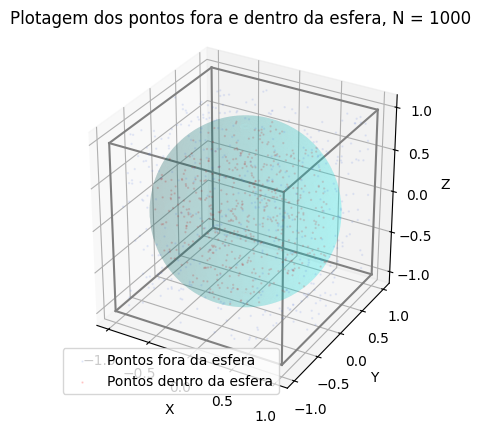

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


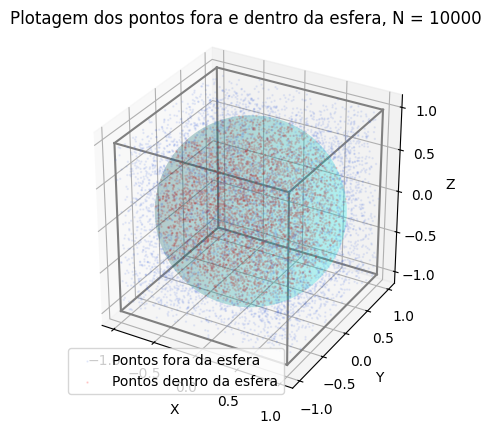

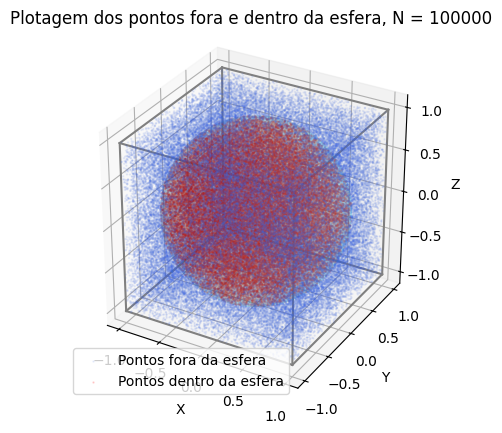

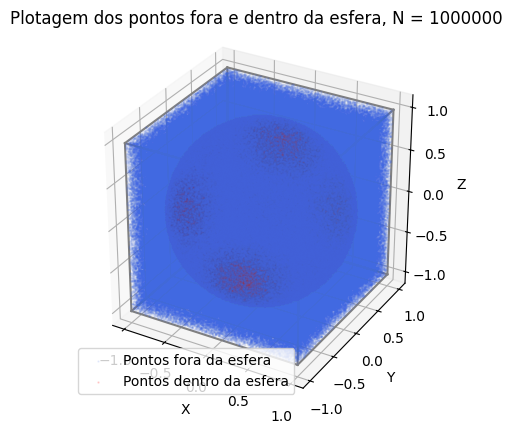

   1000     10000    100000    1000000
0    3.084   3.1020  3.14820  3.138576
1    3.168   3.1302  3.14190  3.140622
2    3.258   3.1386  3.13224  3.141636
3    3.084   3.1116  3.14490  3.141852
4    3.174   3.1206  3.15342  3.141888
5    3.276   3.1296  3.13524  3.138642
6    3.174   3.1221  3.14265  3.140536


/tmp/ipython-input-2203136229.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


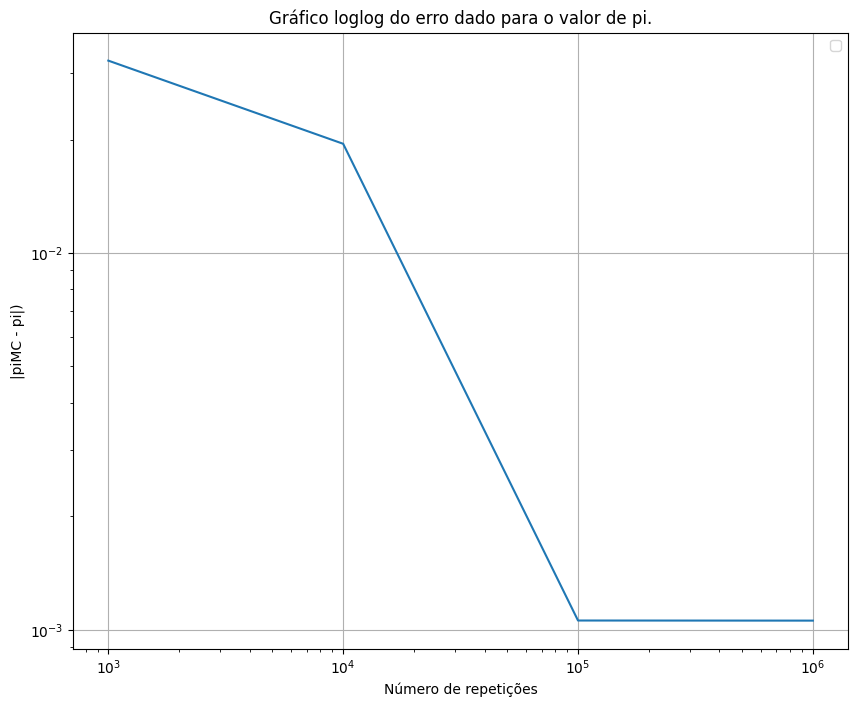

Tempo de de execução foi 87.91606664657593


In [ ]:
# QUESTÃO 6 VETORIZADO

import numpy as np
import time
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
t0 = time.time()
m = 6
N = [10**3, 10**4, 10**5, 10**6]
erros = []
tabela = dict()
for n in N:
  tabela[n] = []

def MMC(N):
  coord_x_ponto_fora = []
  coord_y_ponto_fora = []
  coord_z_ponto_fora = []
  coord_x_ponto_dentro = []
  coord_y_ponto_dentro = []
  coord_z_ponto_dentro = []
  pontos = np.random.uniform(-1, 1 , size = (N,3))
  normas = np.linalg.norm(pontos, axis=1)
  mascara_dentro = normas < 1
  pontos_dentro = pontos[mascara_dentro]
  pontos_fora = pontos[~mascara_dentro]
  coord_x_ponto_fora, coord_y_ponto_fora ,coord_z_ponto_fora = pontos_fora[:,0], pontos_fora[:,1] , pontos_fora[:,2]
  coord_x_ponto_dentro, coord_y_ponto_dentro, coord_z_ponto_dentro  = pontos_dentro[:,0], pontos_dentro[:,1], pontos_dentro[:,2]

  return [6*(pontos_dentro.shape[0]/N), coord_x_ponto_fora, coord_y_ponto_fora, coord_z_ponto_fora , coord_x_ponto_dentro, coord_y_ponto_dentro, coord_z_ponto_dentro]

# ===== Experimentos =====

for n in N:
    for i in range(m):
      resultados = MMC(n)
      tabela[n].append(resultados[0])
    media = np.mean(tabela[n])
    tabela[n].append(media)
    erros.append(abs(np.pi - media))

    # Plotando o gráfico para os lançamentos dos pontos, esfera e cubo

    # Criar a figura
    fig = plt.figure()

    # Adicionar um eixo 3D
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(1, [-1,1], -1, color = 'gray')
    ax.plot([-1,1], 1, -1, color = 'gray')
    ax.plot([-1,1], -1, -1, color = 'gray')
    ax.plot(-1, [-1,1], -1,color = 'gray')

    ax.plot(1, [-1,1], 1, color = 'gray')
    ax.plot([-1,1], 1, 1, color = 'gray')
    ax.plot([-1,1], -1, 1, color = 'gray')
    ax.plot(-1, [-1,1], 1, color = 'gray')

    ax.plot(-1, 1, [-1,1], color = 'gray')
    ax.plot(-1, -1, [-1,1], color = 'gray')
    ax.plot(1, 1, [-1,1], color = 'gray')
    ax.plot(1, -1, [-1,1], color = 'gray')


    # Definindo o raio da esfera
    raio = 1

    # Criando os valores para os ângulos theta e phi
    # theta varia de 0 a 2*pi para um círculo completo
    theta = np.linspace(0, 2 * np.pi, 100)

    # phi varia de 0 a pi para cobrir o hemisfério superior e inferior
    phi = np.linspace(0, np.pi, 100)

    # Criando uma malha de angulos
    theta, phi = np.meshgrid(theta, phi)

    # Convertendo coordenadas esféricas para cartesianas
    x = raio * np.sin(phi) * np.cos(theta)
    y = raio * np.sin(phi) * np.sin(theta)
    z = raio * np.cos(phi)

    # Plotando a superfície da esfera
    ax.plot_surface(x, y, z, color='cyan', alpha=0.15, linewidth = 0, antialiased=True)

    # Colocando os nomes nos eixos e título ao gráfico
    ax.set_box_aspect((1, 1, 1))
    plt.title(f"Plotagem dos pontos fora e dentro da esfera, N = {n}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.scatter(resultados[1], resultados[2], resultados[3], label = 'Pontos fora da esfera', s = 0.5,  color='royalblue', alpha = 0.10)
    ax.scatter(resultados[4], resultados[5], resultados[6], label = 'Pontos dentro da esfera', s = 0.5, color = 'red', alpha = 0.15)
    ax.set_box_aspect((1, 1, 1))
    plt.legend()
    plt.show()



# Criando a tabela com o pandas
df = pd.DataFrame(tabela)
print(df)

# Plotando o gráfico dilog do erro absoluto para o valor do pi em função do número de pontos lançados

plt.figure(figsize=(10,8))
plt.title("Gráfico loglog do erro dado para o valor de pi.")
plt.ylabel("|piMC - pi|)")
plt.xlabel("Número de repetições")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.plot(N, erros)
plt.show()

print(f"Tempo de de execução foi {time.time() - t0}")



In [ ]:
# QUESTÃO 7

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



def lancamentos(n, m):
  counter = 0
  eventos = np.random.randint(0,2, n)
  for i in range(n):
    if eventos[i] == 0:
      counter += 1
      if counter == m:
        return 1
    else:
      counter = 0
  return 0

#Função lançamentos retorna 1 caso ocorra um sucesso ou 0 após percorrer todos os eventos e não encontrar nenhum sucesso

# Definido número de lançamentos e quantidades de vezez que deve repetir a moeda cara para que ocorra sucesso
N = [10,20]
M = [3,5]

# Número de vezes que os experimentos serão realizados
k = 10**5

#Inicializando o dicinário que conterá o número de sucessos para cada caso
resultados = dict()

for n in N:
  for m in M:
    resultados[(n,m)] = 0

# ===== Experimentos =====

for i in range(k):
  for n in N:
    for m in M:
      resultados[(n,m)] += lancamentos(n,m)


# Construindo uma tabela para alocar os dados

tabela = pd.DataFrame(index=[3,5], columns=[ "N = 10", "N = 20"])

for i in range(2):
  tabela.iloc[:, i] = [resultados[(N[i],3)]/k, resultados[(N[i],5)]/k]
print(tabela)





{(10, 3): 50980, (10, 5): 10875, (20, 3): 78658, (20, 5): 25042}
    N = 10   N = 20
3   0.5098  0.78658
5  0.10875  0.25042


A partícula conseguiu chegar ao último vértice
O seu caminho foi [1, 2, 3, 4, 6, 7, 8, 9]



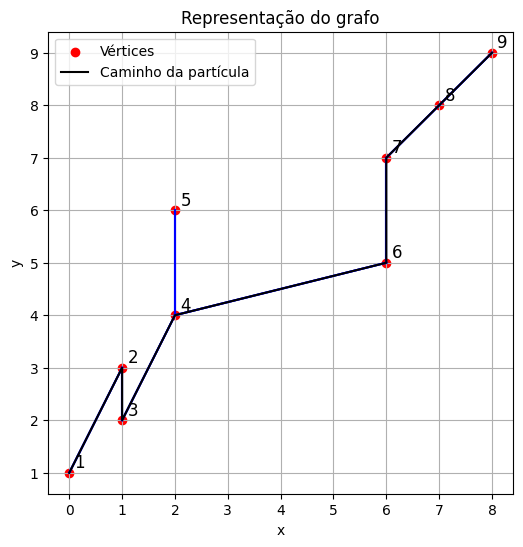

A probabilidade de a partícular chegar no final é 51.0%






A partícula conseguiu chegar ao último vértice
O seu caminho foi [1, 2, 3, 4, 5, 6, 7, 8]



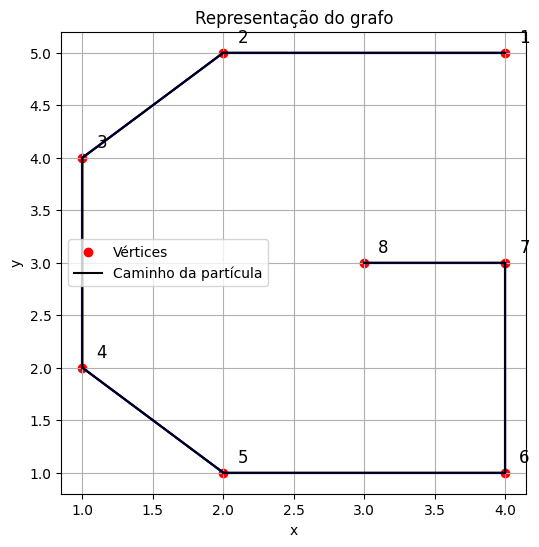

A probabilidade de a partícular chegar no final é 100.0%






A partícula não conseguiu chegar ao último vértice
O seu caminho foi [1, 2, 4, 5, 6]



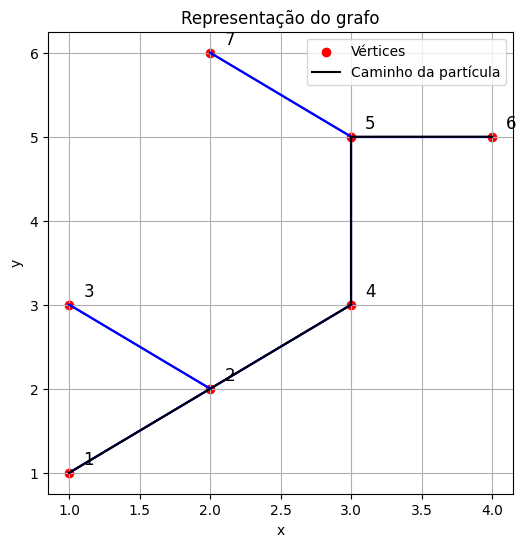

A probabilidade de a partícular chegar no final é 24.3%






A partícula não conseguiu chegar ao último vértice
O seu caminho foi [1, 4]



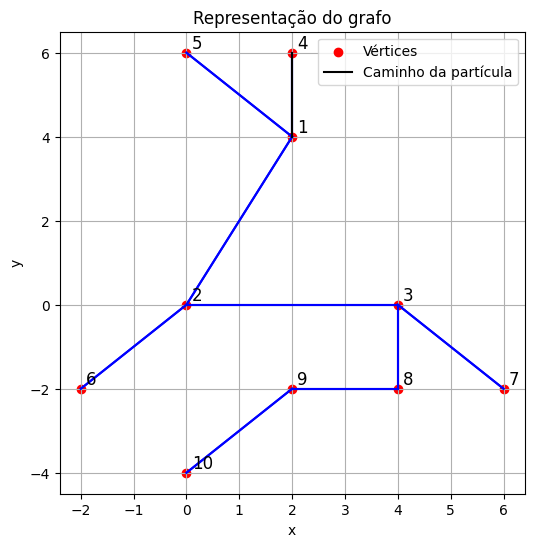

A probabilidade de a partícular chegar no final é 8.0%








In [ ]:
# QUESTÃO 8

import numpy as np
from matplotlib import pyplot as plt

# Inicialiar um dicionário com n elementos, onde esses elementos são tuplas e indicam as coordenas dos vértices desse grafo, o grafo n é identificado pelo seu índice no dicionário
lista_vertices = [
    {
    0: (0, 1),
    1: (1, 3),
    2: (1, 2),
    3: (2, 4),
    4: (2, 6),
    5: (6, 5),
    6: (6, 7),
    7: (7, 8),
    8: (8, 9)
  },

 {
    0: (4, 5),
    1: (2, 5),
    2: (1, 4),
    3: (1, 2),
    4: (2, 1),
    5: (4, 1),
    6: (4, 3),
    7: (3, 3)
},
 {
    0: (1, 1),
    1: (2, 2),
    2: (1, 3),
    3: (3, 3),
    4: (3, 5),
    5: (4, 5),
    6: (2, 6)
},
 {
    0: (2, 4),
    1: (0, 0),
    2: (4, 0),
    3: (2, 6),
    4: (0, 6),
    5: (-2, -2),
    6: (6, -2),
    7: (4, -2),
    8: (2, -2),
    9: (0, -4)
}
]

#Inicializar uma dicionário chamado de conectividade que indica com quem um vértice está ligado, onde o  key value é o vértice e o value é uma conjunto onde os índices dos vértices os quais esse vértice está ligado estão presentes

lista_conectividade =[
    {
        0: {1},
        1: {0,2},
        2: {1,3},
        3: {2,4,5},
        4: {3},
        5: {3,6},
        6: {5,7},
        7: {6,8},
        8: {7}
    }

    ,{
    0: {1},
    1: {0,2},
    2: {1,3},
    3: {2,4},
    4: {3,5},
    5: {4,6},
    6: {5,7},
    7: {6}
},
  {
    0: {1},
    1: {0,2,3},
    2: {1},
    3: {1,4},
    4: {3,5,6},
    5: {4},
    6: {4}
},
 {
    0: {1, 3, 4},
    1: {0, 2, 5},
    2: {1, 6, 7},
    3: {0},
    4: {0},
    5: {1},
    6: {2},
    7: {2, 8},
    8: {7, 9},
    9: {8}
}

]



def plotar_grafo(vertices, conectividade, coord_x_caminho, coord_y_caminho):

    # Inicialilzando as listas que terão as coordenas x e y dos vértices

    coord_x = []
    coord_y = []

  # Vericando se o grafo faz sentido
    lista_remover = []
    for key in vertices.keys():
        if len(conectividade[key]) != 0:
            for elem in conectividade[key]:
                if( not (key  in conectividade[elem])):
                    raise(f"Esse grafo não está coerente, deve-se checar as conectividades, pois {key} não está ligado com {conectividade[elem]}")
        else:
          lista_remover.append(key)

    if len(lista_remover) != 0:
      for elem in lista_remover:
        vertices.pop(elem)

    plt.figure(figsize=(6,6))

    plt.title("Representação do grafo")


    # Plotando os pontos

    for value in vertices.values():
        coord_x.append(value[0])
        coord_y.append(value[1])

    # Plotando os índices no gráfico

    for vertice in vertices.keys():
      plt.text(vertices[vertice][0] + 0.1, vertices[vertice][1] + 0.1, s =  f'{vertice + 1}', fontdict=dict(color='k', size=12))

    plt.scatter(coord_x, coord_y, label="Vértices", color='r')

    # Plotando as arestas
    for key in vertices.keys():
        vertices_alvo = conectividade[key]
        xo = vertices[key][0]
        yo = vertices[key][1]
        if (len(vertices_alvo) != 0):
            for id in vertices_alvo:
                plt.plot([xo, vertices[id][0]], [yo, vertices[id][1]], color = 'b')


    # Plotando o caminho realizado pela partícula

    plt.plot(coord_x_caminho, coord_y_caminho, color = 'k', label = "Caminho da partícula")


    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

def procurar_vertice(vertice_atual, vertices, conectividade,modo):
  # Essa função seleciona os possíveis vértices para os quais a partícula pode caminhar, se ele não poder caminhar mais, essa função retorna False e o programa encerra
  vertices_alvo = conectividade[vertice_atual] - vertices_visitados
  lista_vertices_alvo = list(vertices_alvo)
  if modo == 0:
    if (len(lista_vertices_alvo) == 0):
      return False
    else:
      return True

  dado = np.random.randint(0,len(vertices_alvo))
  # Pega um número aleatório entre [0, número de vértices vizinhos)
  vertices_visitados.add(lista_vertices_alvo[dado]) # Adicona o vértice que a partícula ira se descolocar para o conjunto dos vértices visitados
  return lista_vertices_alvo[dado]


def caminhar(vertice_inicial,vertices, conectividade):
  # Essa função faz a partícula caminhar, atualizando o vértice atual e verificando se chegou no objetivo
  vertice_atual = vertice_inicial
  while ((procurar_vertice(vertice_atual, vertices, conectividade, modo = 0))  ):
    vertice_atual = procurar_vertice(vertice_atual, vertices, conectividade,modo = 1)
  if vertice_atual == (len(vertices.keys()) - 1):
      return 0
  return 1


# ===== Experimentos =====

M = 10**3

for i in range(len(lista_vertices)):
  sucessos = 0
  for j in range(M):
    vertices_visitados = {0}

    if caminhar(0, lista_vertices[i], lista_conectividade[i]) == 0:
      conseguiu = True
      sucessos += 1
    else:
      conseguiu = False

    if j == M -1:

      # iniciando as listas com coordenadas dos pontos visitados

      coord_x = []
      coord_y = []

      lista_vertices_visitados = list(vertices_visitados)
      lista_vertices_visitados_atualizado = []

      for vertice in lista_vertices_visitados:
        lista_vertices_visitados_atualizado.append(vertice + 1)

      for vertice in vertices_visitados:
        coord_x.append(lista_vertices[i][vertice][0])
        coord_y.append(lista_vertices[i][vertice][1])

      if conseguiu:
        print("A partícula conseguiu chegar ao último vértice")
      else:
        print("A partícula não conseguiu chegar ao último vértice")

      print(f"O seu caminho foi {(lista_vertices_visitados_atualizado)}\n")

      plotar_grafo(lista_vertices[i], lista_conectividade[i], coord_x, coord_y)

      print(f"A probabilidade de a partícular chegar no final é {(sucessos / M)*100}%")
      print("\n")
      print("\n")
      print("\n")












